## Hand Recognition SetUp

IN3062

This notebook sets up the images ready for classification with 'Hands CNN Attempt 4.ipynb'. Saving the X and y train as .pickle files.

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
import random
import pickle

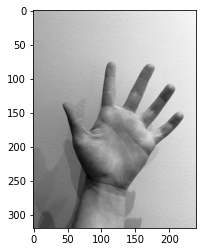

In [2]:
DIRECTORY = "C:/Users/schal/Documents/hands/testing/"
CATEGORIES = ["withHand", "withoutHand"]

# get image
for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)  # path into hands directory
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()  # displays image
        break
    break
# should display first image of "withHand" in grayscale

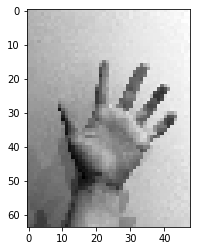

In [3]:
WIDTH = 48
HEIGHT = 64

# resizing images
resizing_array = cv2.resize(img_array, (WIDTH, HEIGHT))
plt.imshow(resizing_array, cmap='gray')
plt.show()
# should display first image of "withHand" in grayscale resized to 48x64

In [4]:
# creating training data
training_data  = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DIRECTORY, category)
        cat_num = CATEGORIES.index(category)  # maps category types to numerical value, e.g withHand -> 0 ; withoutHand -> 1
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resizing_array = cv2.resize(img_array, (WIDTH, HEIGHT))
                training_data.append([resizing_array, cat_num])  # adds to training data list
            except Exception as e:
                print("no " + path + img)

create_training_data()

# view length of training data
print(len(training_data))

408


In [5]:
# shuffle the data and double check labels (assigned numerical values) are correct

random.shuffle(training_data)

for sample in training_data:
    print(sample[1])

1
1
1
1
0
1
0
0
1
0
1
0
0
0
1
1
0
0
1
1
1
1
1
1
1
0
1
0
1
0
1
1
0
0
1
0
0
0
0
0
1
1
1
1
0
1
1
1
1
1
0
1
0
0
1
0
1
1
1
1
0
1
0
1
0
0
1
0
0
1
1
1
1
1
1
1
1
0
1
0
0
0
1
0
0
1
1
0
1
1
1
1
1
1
0
1
1
0
0
1
0
1
0
0
0
1
0
1
0
0
0
1
1
0
1
1
1
1
0
0
0
1
0
0
0
0
1
1
1
0
1
1
0
1
0
0
1
1
0
0
1
0
0
1
1
1
0
0
0
1
1
0
1
0
1
1
1
0
1
0
0
0
0
0
0
0
0
1
0
0
1
0
1
1
1
1
0
0
0
0
0
1
0
1
0
1
1
1
1
0
1
0
1
1
0
1
0
1
1
0
1
0
0
0
1
1
0
0
0
0
0
1
0
0
1
1
0
0
0
1
0
0
1
1
0
0
0
0
0
1
0
1
0
0
1
0
1
1
0
1
0
1
0
1
0
0
1
1
0
1
1
1
1
1
0
0
1
0
1
0
0
1
1
1
0
1
1
0
1
0
0
0
0
0
0
1
1
1
0
0
1
0
0
0
0
1
1
0
1
1
1
0
1
0
0
1
1
1
0
1
0
0
0
0
0
0
1
0
1
0
1
1
1
1
0
1
0
1
0
1
1
1
1
1
0
1
0
1
0
1
0
1
1
1
1
1
0
0
0
1
1
0
0
1
0
1
0
1
1
0
0
0
1
0
0
0
1
0
1
0
0
1
0
1
0
0
1
1
1
0
0
0
0
0
0
1
0
1
0
1
1
1
0
1
1
1
1
0
0
0
1
0
1
1
0
0
0
0
0
1
1
0
0
1
0
1
0
1


In [6]:
# packing shuffled data into variables for use before NN

X = []  # feature set
y = []  # labels

for features, label in training_data:  # building X and y out into lists
    X.append(features)
    y.append(label)
    
# NN will not take X as list
# reshape(how many features...('-1' will catch all ), image dimensions, 1 <- grayscale OR 3 <- for colour)
X = np.array(X).reshape(-1, WIDTH, HEIGHT, 1)

In [7]:
# saving training data ready for use with NN/CNN use

pickle_out = open("X.pickle", "wb")  # X
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")  # y
pickle.dump(y, pickle_out)
pickle_out.close()

print("save successful!")

save successful!
